## **<center><font style="color:rgb(100,109,254)">First Come First Serve (FCFS) Scheduling</font> </center>**
### **<center><font style="color:rgb(100,109,254)">Advance OS</font> </center>**

#### 1. Taking Input (Process Name, Arrival Time, CPU Time) form User

##### 1.1 Enter Process Names

In [1]:
print("Enter Name of Processes as P0, P1, P2...... with space separted")

# This will Make the list of Processes Names entered by user
processList = list(map(str, input().split()))

processList

Enter Name of Processes as P0, P1, P2...... with space separted


['P0', 'P1', 'P2', 'P3']

##### 1.2 Enter Arrival Time 

In [2]:
print("Enter Arrival Time for each Process mentioned above with space separted")

# This will Make the list of Processes arrival time entered by user
arrivalTime = list(map(float, input().split()))

arrivalTime

Enter Arrival Time for each Process mentioned above with space separted


[2.0, 1.0, 0.0, 4.0]

##### 1.3 Enter CPU Time 

In [3]:
print("Enter CPU Time for each Process mentioned above with space separted")

# This will Make the list of Processes CPU time entered by user
CPUTime = list(map(float, input().split()))

CPUTime

Enter CPU Time for each Process mentioned above with space separted


[20.0, 25.0, 14.0, 10.0]

##### 1.4 Display in the form Table

In [4]:
import pandas as pd

data = {}

data["Process Name"] = processList
data["Arrival Time (AT)"] = arrivalTime
data["CPU Time / Burst Time"] = CPUTime

ECTMatrix = pd.DataFrame(data)

print("-----------------------------------------------------")
print("\t\t\tFCFS")
print("    Input Matirx with Arrival Time and CPU Time")
print("-----------------------------------------------------")
ECTMatrix

-----------------------------------------------------
			FCFS
    Input Matirx with Arrival Time and CPU Time
-----------------------------------------------------


,Process Name,Arrival Time (AT),CPU Time / Burst Time
0,P0,2.0,20.0
1,P1,1.0,25.0
2,P2,0.0,14.0
3,P3,4.0,10.0


#### 2. Sort the Data frame on the basis of arrival time

In [5]:
sortedECTMatrix = ECTMatrix.sort_values('Arrival Time (AT)')

print("=====================================================")
print("\t\t\tFCFS")
print("\t\t    Sorted Matrix")
print("=====================================================")
sortedECTMatrix

			FCFS
		    Sorted Matrix


,Process Name,Arrival Time (AT),CPU Time / Burst Time
2,P2,0.0,14.0
1,P1,1.0,25.0
0,P0,2.0,20.0
3,P3,4.0,10.0


##### 2.1 Reset the index values

In [6]:
sortedECTMatrix.reset_index(drop=True, inplace=True)
sortedECTMatrix

,Process Name,Arrival Time (AT),CPU Time / Burst Time
0,P2,0.0,14.0
1,P1,1.0,25.0
2,P0,2.0,20.0
3,P3,4.0,10.0


#### 3. Findng the start time and Completion time of each Process

In [7]:


currentTime = sortedECTMatrix["Arrival Time (AT)"][0]
gantChart = []

for p in range(len(sortedECTMatrix)):

    gantChart.append([currentTime, currentTime + sortedECTMatrix["CPU Time / Burst Time"][p]])
    currentTime+= sortedECTMatrix["CPU Time / Burst Time"][p]

gantChart


[[0.0, 14.0], [14.0, 39.0], [39.0, 59.0], [59.0, 69.0]]

##### 3.1 Add start time and Completion time of each process in data frame

In [8]:
startTime = []
complTime = []

for i in range(0,len(sortedECTMatrix)):
    startTime.append(gantChart[i][0]) 
    complTime.append(gantChart[i][1])

sortedECTMatrix["Start Time"] = startTime
sortedECTMatrix["Completion Time"] = complTime

sortedECTMatrix

,Process Name,Arrival Time (AT),CPU Time / Burst Time,Start Time,Completion Time
0,P2,0.0,14.0,0.0,14.0
1,P1,1.0,25.0,14.0,39.0
2,P0,2.0,20.0,39.0,59.0
3,P3,4.0,10.0,59.0,69.0


#### 4. Find Turn Around time for each process and average Turn Around Time

        Turn around Time  = Completion Time - Arrival Time 

In [9]:
TurnAroundTime = []

for i in range(0,len(sortedECTMatrix)):

    TurnAroundTime.append(sortedECTMatrix["Completion Time"][i] - sortedECTMatrix["Arrival Time (AT)"][i])

TurnAroundTime

[14.0, 38.0, 57.0, 65.0]

##### 4.1 Add Turn Around column in current data frame 

In [10]:
sortedECTMatrix["Turnaround Time"] = TurnAroundTime

sortedECTMatrix

,Process Name,Arrival Time (AT),CPU Time / Burst Time,Start Time,Completion Time,Turnaround Time
0,P2,0.0,14.0,0.0,14.0,14.0
1,P1,1.0,25.0,14.0,39.0,38.0
2,P0,2.0,20.0,39.0,59.0,57.0
3,P3,4.0,10.0,59.0,69.0,65.0


##### 4.2 Finding Average Turn Around Time and Maskespan

        Average Turn Around Time = Sum of Turn around Time / Total no. of Process
        Makespan = Maximum of Turn around Time 

In [11]:
averageTurnAroundTime = sortedECTMatrix["Turnaround Time"].sum()/len(sortedECTMatrix)
makespan = max(sortedECTMatrix["Turnaround Time"])

print(f"The average turn around time: {averageTurnAroundTime}")
print(f"The Makespan is: {makespan}")


The average turn around time: 43.5
The Makespan is: 65.0


#### 5. Finding the Waiting Time for each Process

        Waiting Time = Turn Around Time - CPU Time

In [12]:
WeightingTime = []

for i in range(0,len(sortedECTMatrix)):

    WeightingTime.append(sortedECTMatrix["Turnaround Time"][i] - sortedECTMatrix["CPU Time / Burst Time"][i])

WeightingTime


[0.0, 13.0, 37.0, 55.0]

##### 5.1 Add Waiting Time column in current Data Frame

In [13]:
sortedECTMatrix["Waiting Time"] = WeightingTime

sortedECTMatrix

,Process Name,Arrival Time (AT),CPU Time / Burst Time,Start Time,Completion Time,Turnaround Time,Waiting Time
0,P2,0.0,14.0,0.0,14.0,14.0,0.0
1,P1,1.0,25.0,14.0,39.0,38.0,13.0
2,P0,2.0,20.0,39.0,59.0,57.0,37.0
3,P3,4.0,10.0,59.0,69.0,65.0,55.0


##### 5.2 Average Waiting Time 

In [14]:
averageWeightingTime= sortedECTMatrix["Waiting Time"].sum()/len(sortedECTMatrix)

print(f"The average waiting time: {averageWeightingTime}")

The average waiting time: 26.25


#### 6. Draw Start Time, Completion Time, Turnaround Time, and Waiting Time for each Process

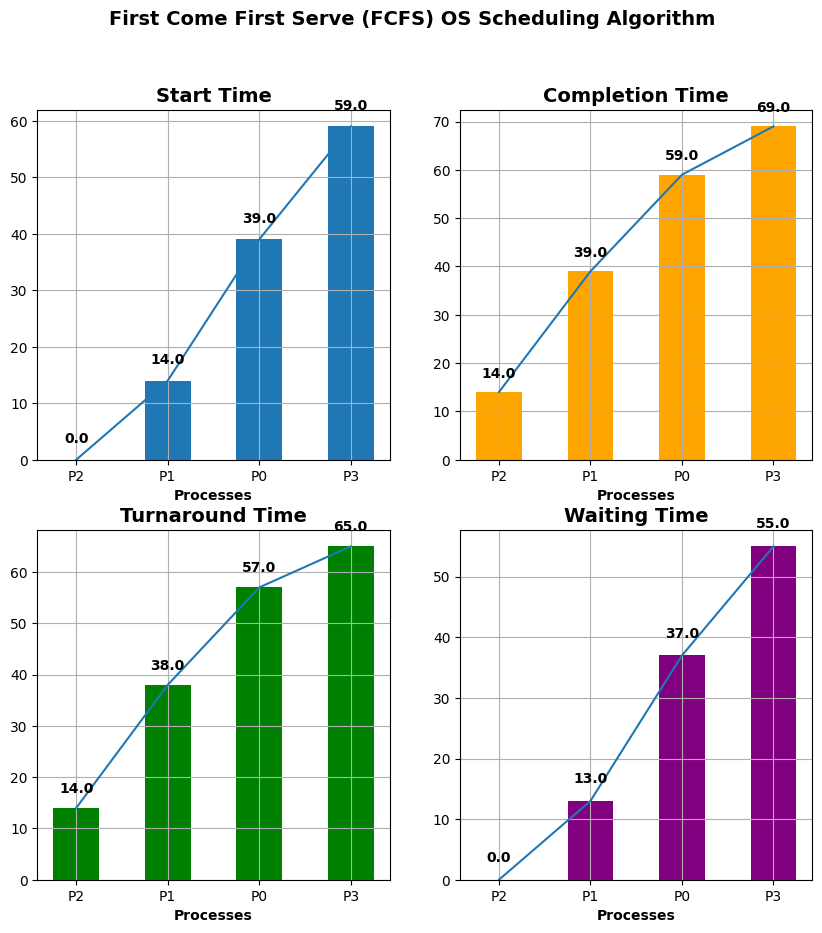

In [15]:
import matplotlib.pyplot as plt

# plt.figure(figsize=(5,5))

# plt.bar(sortedECTMatrix["Process Name"], sortedECTMatrix["Completion Time"])
# # plt.bar(sortedECTMatrix["Process Name"], sortedECTMatrix["Completion Time"])
# plt.show()

plt.figure(figsize=(10,10))
plt.subplot(221)
plt.plot(sortedECTMatrix["Process Name"], sortedECTMatrix["Start Time"])
plt.bar(sortedECTMatrix["Process Name"], sortedECTMatrix["Start Time"], width=0.5)

# Add labels to the bars
for i, v in enumerate(sortedECTMatrix["Start Time"]):
    plt.text(i, v + 3, str(v), ha='center', fontweight='bold')

plt.title("Start Time", fontweight = 'bold', fontsize = '14')
plt.xlabel("Processes", fontweight = 'bold', fontsize = '10')
plt.grid("on")
plt.subplot(222)
plt.plot(sortedECTMatrix["Process Name"], sortedECTMatrix["Completion Time"])
plt.bar(sortedECTMatrix["Process Name"], sortedECTMatrix["Completion Time"],
        width = 0.5, color = "orange")

# Add labels to the bars
for i, v in enumerate(sortedECTMatrix["Completion Time"]):
    plt.text(i, v + 3, str(v), ha='center', fontweight='bold')

plt.title("Completion Time", fontweight = 'bold', fontsize = '14')
plt.xlabel("Processes", fontweight = 'bold', fontsize = '10')
plt.grid("on")
plt.subplot(223)
plt.plot(sortedECTMatrix["Process Name"], sortedECTMatrix["Turnaround Time"])
plt.bar(sortedECTMatrix["Process Name"], sortedECTMatrix["Turnaround Time"],
        width=0.5, color = 'green')

# Add labels to the bars
for i, v in enumerate(sortedECTMatrix["Turnaround Time"]):
    plt.text(i, v + 3, str(v), ha='center', fontweight='bold')

plt.title("Turnaround Time", fontweight = 'bold', fontsize = '14')
plt.xlabel("Processes", fontweight = 'bold', fontsize = '10')
plt.grid("on")
plt.subplot(224)
plt.plot(sortedECTMatrix["Process Name"], sortedECTMatrix["Waiting Time"])
plt.bar(sortedECTMatrix["Process Name"], sortedECTMatrix["Waiting Time"],
        width=0.5, color = "purple")

# Add labels to the bars
for i, v in enumerate(sortedECTMatrix["Waiting Time"]):
    plt.text(i, v + 3, str(v), ha='center', fontweight='bold')

plt.title("Waiting Time", fontweight = 'bold', fontsize = '14')
plt.xlabel("Processes", fontweight = 'bold', fontsize = '10')
plt.grid("on")

plt.suptitle("First Come First Serve (FCFS) OS Scheduling Algorithm", fontweight = 'bold', fontsize = '14')
# Show the plot
plt.show()


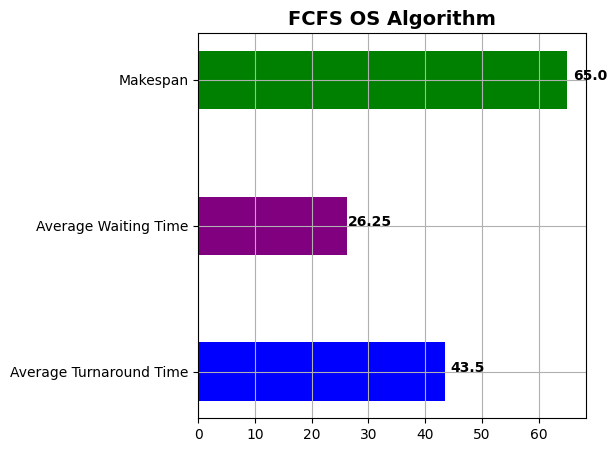

In [17]:
forPlot = [averageTurnAroundTime, averageWeightingTime, makespan]
hBary = ["Average Turnaround Time", "Average Waiting Time", "Makespan"]

colors = ['BLUE', 'purple', 'green']

plt.figure(figsize=(5,5))
plt.barh(hBary,forPlot, color = colors, height=0.4)

for i, v in enumerate(forPlot):
    plt.text(v + 4, i , str(v), ha='center', fontweight='bold')

plt.title("FCFS OS Algorithm", fontweight = 'bold', fontsize = '14')
plt.grid("on")
      # set grid transparency to 0.5
plt.show()